In [1]:
import os

In [2]:
DATA_ROOT = '/home/zzl/ImageNet/ImageNet/ILSVRC2012/'

In [3]:
cname = 'n02108000.tar'

In [4]:
def canny_dec(img):
    img = np.asarray(img)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_np = cv2.GaussianBlur(img_gray, (5, 5), 0)
    canny = cv2.Canny(img_np, 50, 150)
    canny = 255 - canny
    img_edge = np.stack([canny, canny, canny], axis=2)
    img_edge = img_edge.astype(dtype=np.uint8)
    img_edge = Image.fromarray(img_edge, mode='RGB')
    return img_edge


In [5]:
import random
from PIL import Image

In [6]:
files = os.listdir(os.path.join(DATA_ROOT, cname))

In [119]:
f = random.choice(files)

In [6]:
f = 'n02108000_944.JPEG'

In [7]:
i = 0

In [7]:
import numpy as np

In [8]:
selected = -1

In [176]:
f = files[743]

In [173]:
for i in range(selected+1, len(files)):
    img = Image.open(os.path.join(DATA_ROOT, cname, files[i]))
    if np.shape(img) == (333, 500, 3):
        selected = i
        print(selected)
        break

743


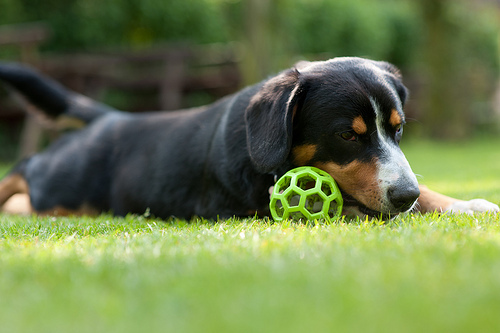

In [174]:
img

In [115]:
f

'n02108000_4554.JPEG'

In [177]:
HED_DIR = '/home/zzl/ImageNet/ImageNet/image_hed/'

In [178]:
import scipy.io as sio

In [179]:
hed_edge = sio.loadmat(os.path.join(HED_DIR, cname, f.split('.')[0]+'.mat'))

In [180]:
import matplotlib.pyplot as plt

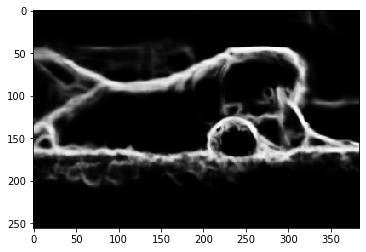

In [181]:
plt.imshow(hed_edge['edge_predict'], cmap='gray')

In [40]:
import numpy as np

In [41]:
np.shape(img)

(143, 160, 3)

In [42]:
np.shape(hed_edge['edge_predict'])

(256, 286)

In [43]:
import cv2

In [46]:
img_r = img.resize((224, 224))

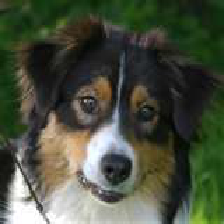

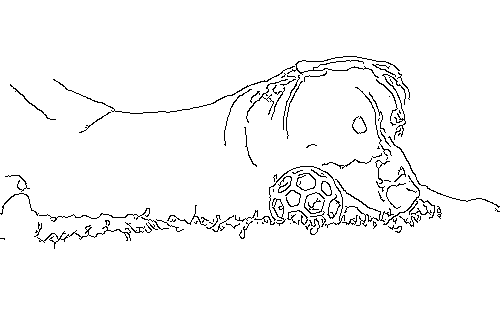

In [60]:
canny_dec(img)

In [210]:
hed_img_edge = 1 - np.round(hed_edge['edge_predict'])
hed_img_edge = np.stack([hed_img_edge, hed_img_edge, hed_img_edge], axis=2)
hed_img_edge = hed_img_edge * 255
hed_img_edge = hed_img_edge.astype(dtype=np.uint8)
hed_img_edge = Image.fromarray(hed_img_edge)

In [212]:
hed_img_edge.save('edge_compare_hed.png')

In [76]:
plt.rc('font', family='Times New Roman')

In [77]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": "\n".join([
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
    ]),
})

In [80]:
np.shape(img)

(333, 500, 3)

In [81]:
np.shape(hed_img_edge)

(256, 384, 3)

In [199]:
img = img.resize((384, 256))

In [200]:
img.save('edge_compare_original.jpg')

In [187]:
img_test = cv2.imread(os.path.join(DATA_ROOT, cname, f))

In [189]:
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

In [191]:
img = Image.open(os.path.join(DATA_ROOT, cname, f))

In [192]:
np.sum(np.abs(img_test - np.asarray(img)))

11

In [201]:
img_sa = Image.open('edge_compare_original.jpg')

In [202]:
img_sa_cv2 = cv2.imread('edge_compare_original.jpg')

In [203]:
img_sa_cv2 = cv2.cvtColor(img_sa_cv2, cv2.COLOR_BGR2RGB)

In [204]:
np.sum(np.abs(np.asanyarray(img_sa) - img_sa_cv2))

9278946

In [206]:
np.shape(img)

(256, 384, 3)

In [185]:
import cv2

In [207]:
img_canny = canny_dec(img)

In [209]:
img_canny.save('edge_compare_canny.png')

In [89]:
plt.figure(figsize=(36, 12))

<Figure size 2592x864 with 0 Axes>

<Figure size 2592x864 with 0 Axes>

In [90]:
384*3

1152

Text(0.5, -0.2, '(c) HED')

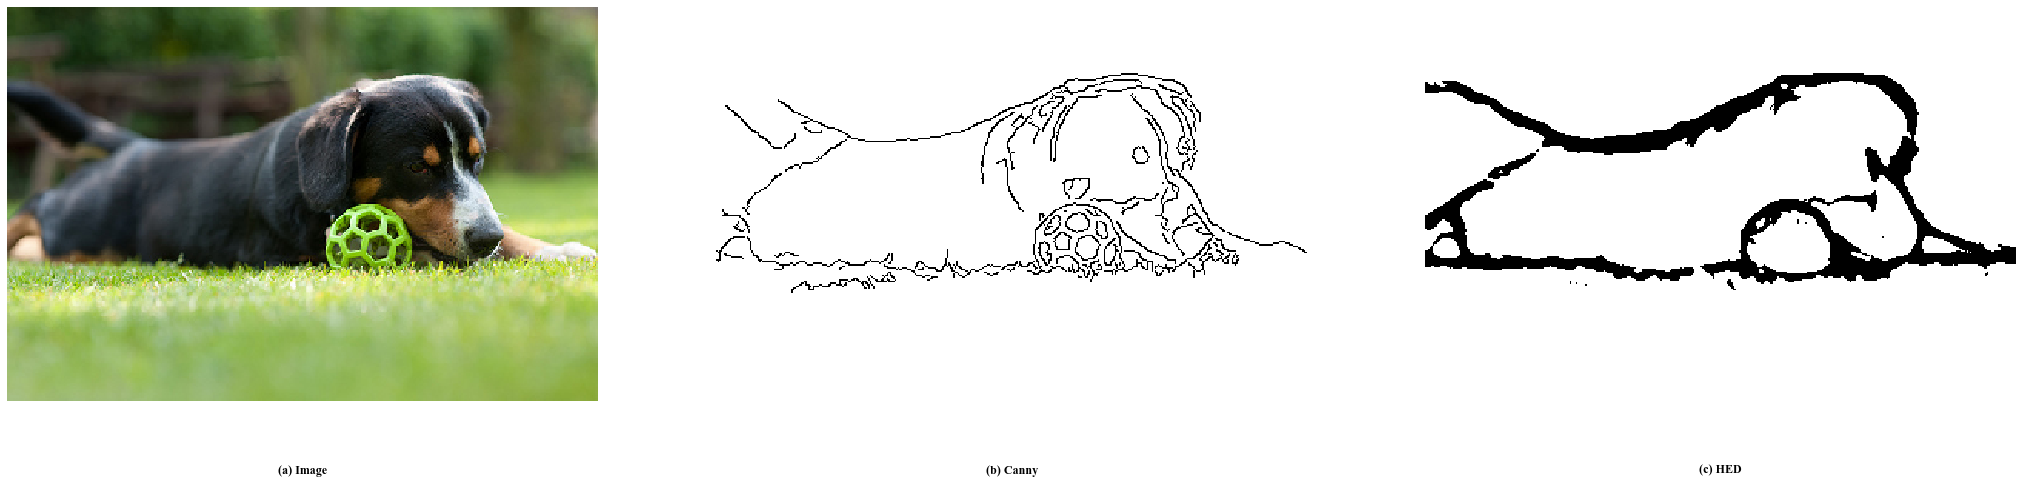

In [88]:
plt.figure(figsize=(36, 12))

plt.subplot(131)
plt.axis('off')
plt.imshow(img)
plt.title('(a) Image', y=-0.2)
plt.subplot(132)
plt.axis('off')
plt.imshow(canny_dec(img))
plt.title('(b) Canny', y=-0.2)
plt.subplot(133)
plt.axis('off')
plt.imshow(hed_img_edge)
plt.title('(c) HED', y=-0.2)
# plt.savefig('edge_exp.pdf')